 # Immunization Rates in California and Herd Immunity
In the past few years the anti-vaccine movement became national news and their views became well-known. The language they used framed the issue as the government violating the right of the individual to choose what medical treatment they or their family can obtain. This movement found its justification in medical papers that found correlations between vaccines and Autism. These papers found that the links between Autism and Vaccines were significant and traced the cause to a preservative in the vaccines called Thiomersal, which contains Mercury as part of its molecular structure. 

Families now found themselves armed with a practical scapegoat in Mercury, a known poisonous substance, and a small cohort of medical professionals who could back them up. People began acting on these beliefs and obtained exemptions to vaccinations for their children. These exemptions were Personal Belief Exemptions and could be found across the country. The purpose of the exemptions was to accommodate those whose religious beliefs forbade them from receiving certain vaccines. It wasn't seen as a threat to public health because it was assumed that the amount of people seeking these exemptions would be so low that the public health cost of offering the Exemption was minimal. 

However, if the number of people within a population seeking exemptions gets too large, then the immunity of the population, or herd, becomes compromised. Unvaccinated people become more likely breeding grounds for different diseases. A vaccinated person will be able to overcome a Tetanus infection because their body already has antibodies. The unvaccinated person who becomes exposed, will incubate the bacteria and may become sick. If the Tetanus bacteria mutates just enough within the host he or she can then infect other people with the new strain. This person is now considered a disease vector. Herd immunity relies on the fact that if enough people are vaccinated, disease outbreaks are prevented because a vaccinated person isn't a likely disease vector. As a result the vaccine becomes less potent across the population and even vaccinated people can become ill.
## Questions
* Has Herd Immunity been compromised in California?
* Are Private schools more culpable for higher rates of exemption, i.e. lower rates of vaccination.
* Does the economic class of the child affect exemption rates?

In this project we will explore the effects of these anti-vaccination beliefs on the population of California. My assumptions going into the project are that I expect to find more Personal Belief Exemptions in private schools than I do in public schools. My hypothesis is that rich, upper middle class families are more likely to seek personal belief exemptions because they are more likely to read about the anti-vaccine movement and to seek exemptions for their children.

## Hypothesis
* Private school will show a higher rate of non medical exemptions than Public schools.
* Families with higher incomes will also show a higher rate of non-medical exemptions.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

SD = pd.read_csv('studentData.csv')
SD['MMR_rate'] = SD.nMMR / SD.n
SD['DTP_rate'] = SD.nDTP / SD.n
SD['Polio_rate'] = SD.nPolio/ SD.n
SD['PBE_rate'] = SD.nPBE/SD.n
SD['PME_rate'] = SD.nPME/SD.n #Added 5 new columns to my dataframe. rate of vaccination per row.

SDpriv = SD.loc[lambda df:SD['schoolType'] == 'PRIVATE'] #new dataframe with only private schools
SDpub = SD.loc[lambda df:SD['schoolType'] == 'PUBLIC'] #new dataframe with only public schools


### The original dataframe
* The original dataframe is 109,000 rows x 11 columns. 
* The columns, in order from left to right, are School Type
*   County (Categorical) 
*   School (the name of the school // Categorical), 
*   School Code(State identification number of the school// Categorical) 
*   n (class size // Numerical) 
*   nMMR (number of MMR vaccinations in the class // Numerical) 
*   nDTP(number of DTP vaccinations in the class // Numerical) 
*   nPolio (number of Polio vaccinations // Numerical) 
*   nPBE (number of Personal Belief Exemptions // Numerical)
*   nPME (number of Personal Medical Exemptions // Numerical)
*   Year(Numerical)
 

### The modified dataframe description
* The data ranges from years 2000-2014 
* Categorical data includes the County, type of school, the name of the school and school code. The column with school name has spelling errors, so for grouping purposes it's best to use the school code column for accuracy and simplicity. 

* I have also added 5 new columns to the primary dataframe I will use. This means the dataframe has 109,000 rows x 16 columns.
* Any groups or slices of the data will be from this modified dataframe. 
* The added columns are rates of vaccination for each of the vaccine cocktails (nMMR_rate, nDTP_rate, nPolio_rate) and rates of exemption(nPBE_rate, nPME_rate) 
* They take the counts of vaccinations (nMMR, nDTP, nPolio) and exemptions(nPBE, nPME) and divide it by the corresponding value in the "n (class size)" column. A more detailed reason for these additions will be given later.

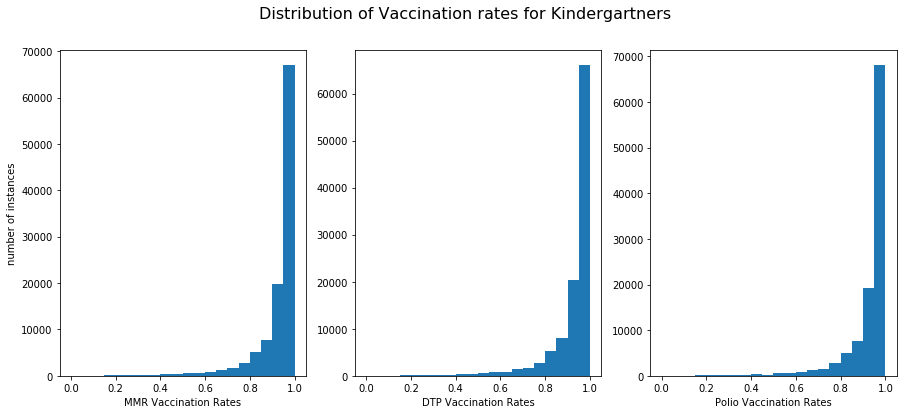

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Distribution of Vaccination rates for Kindergartners', fontsize=16)
axs[0].set_ylabel('number of instances')

axs[0].hist(SD['MMR_rate'], bins=20)
axs[0].set_xlabel('MMR Vaccination Rates');

axs[1].hist(SD['DTP_rate'], bins=20)
axs[1].set_xlabel('DTP Vaccination Rates');

axs[2].hist(SD['Polio_rate'], bins=20);
axs[2].set_xlabel('Polio Vaccination Rates');

# The Immunity of the herd

In the above histograms The x-axis measures the vaccination rate for a specific vaccine or vaccine cocktail. The histograms are then a distribution of the vaccination rates we have in our data. The distributions are nearly identical for all three vaccine cocktails. This is expected since the law requires students to be vaccinated along the same timeline so we would expect the distribution to be similar. The minimum vaccination rate for herd immunity in a healthy population is approximately 95%. It is calculated from the formula $1-(1/R_0)$.

$R_0$ is called the *Reproductive Number*. It is calculated empirically and is unique to every infectious agent. $R_0$ measures the amount of infected cases that can arise from another infection. For most diseases like Measles (found in the MMR vaccine), $R_0 = 12$. Ideally for a distribution of vaccine rates, one would expect to see very low distributions everywhere except around 95%-100%. In the histograms above, the final bin represents the 95%-100% range. 

The data we see above gives us a reason to suspect herd immunity is being compromised. Here we can clearly see that we do not have the distribution of vaccination rates we would want to see at the state level. There are classes with vaccination rates below 95% for all the 3 major vaccines that should be completed by the time a student enters Kindergarten.
While there is cause for concern, this graph is not definitive. We should bear in mind that this data is collected only for Kindergarten students. It's possible that many of the students who weren't vaccinated at the time of registration, were vaccinated later in the year. 



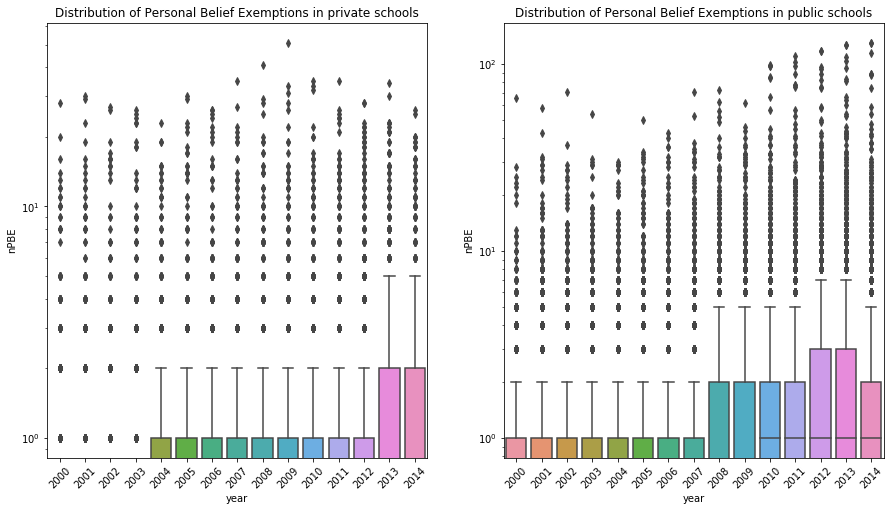

In [4]:
x1= SDpub['year']
y1= SDpub['nPBE']

x2= SDpriv['year']
y2= SDpriv['nPBE']
#defining variables for my plots

plt.figure(figsize=(15,8)) #subplot for my two boxplots
plt.subplot(1, 2, 1)
ax = sns.boxplot(x=x2, y=y2, data=SDpriv).set_title('Distribution of Personal Belief Exemptions in private schools');
plt.yscale("log");
plt.xticks(rotation=45);

plt.subplot(1,2,2)
ax = sns.boxplot(x=x1, y=y1, data=SDpub).set_title('Distribution of Personal Belief Exemptions in public schools');
plt.yscale("log");
plt.xticks(rotation=45);

## The distribution of exemptions across Public and Private schools
The box plot show the distribution of Personal Belief Exemptions (abbreviated PBE) for the years 2000-2014. The two box plots represent private and public schools across California. A log scale was used in these graphs because of the presence of so many outliers. The first things we can note is the difference in scale between the number of exemptions reported in public and private schools overall. Public schools have reported exemptions in the hundreds while private schools didn't report any numbers in that range. 

However, it should be noted that Public schools account for a larger portion of schools in this data set (approximately 81,000 to 28,000) and in California overall. It can be argued that since Public schools have a larger share of the student body then we would expect to see them report more exemptions. 

Private schools show a steady amount of Exemptions 2004-2012 when there is a sudden increase in the size of the box and a sudden increase in the upper extreme value of the box as well. Public schools by contrast began showing an increase in the amount of exemptions in the year 2008, much earlier than private schools. One thing to note is that in these graphs, Public schools after 2010 are the only ones where the median value is shown on the graph despite the log scale. This is mainly due to the large number of outliers that are also in the $10^2$ range

This graph is not conclusive about which segment of the school population is contributing more to higher exemption rates. Based on this graph we can say the Public schools reported more and showed a larger increase in the amount of exemptions.

C:\Users\Omar\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


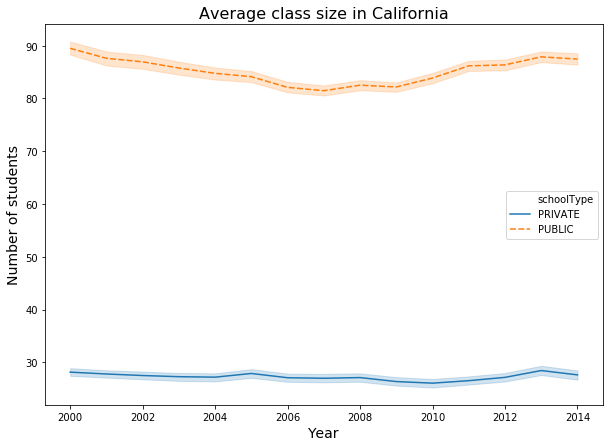

In [5]:
plt.figure(figsize=(10,7))
>>> ax = sns.lineplot(x="year", y="n", hue="schoolType", style="schoolType", data=SD)

plt.title('Average class size in California', Fontsize=16);
plt.xlabel('Year', Fontsize=14);
plt.ylabel('Number of students', Fontsize=14);

# Class sizes
The difference between private and public school class sizes is made very clear in this graph. It is important to note that no teacher is leading a class of 90 students. Schools that have 90 Kindergarten students simply add all the students under all the teachers as one class when they report the data.


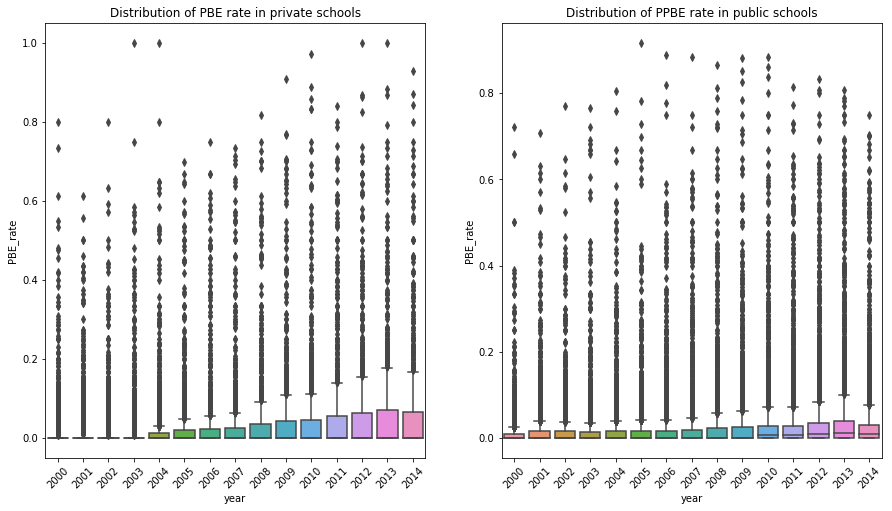

In [6]:
x1= SDpub['year']
y3= SDpub['PBE_rate']

x2= SDpriv['year']
y4= SDpriv['PBE_rate']

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
ax = sns.boxplot(x=x2, y=y4, data=SDpriv).set_title('Distribution of PBE rate in private schools')
plt.xticks(rotation=45);
plt.subplot(1,2,2)
ax = sns.boxplot(x=x1, y=y3, data=SDpub).set_title('Distribution of PPBE rate in public schools')
plt.xticks(rotation=45);

## Using the rate of exemption per class
From the initial dataframe I created a new column that calculates the ratio of Personal Belief Exemptions (PBEs) to the class size, n. The box plots above use this rate instead of the raw counts reported by the schools. This allows us to control for the apparent larger class sizes and student population. 

The results are still mixed however where the box plots based on raw counts lean towards Public schools being more to blame, the box plots based on the rate of exemptions show a much different pattern. Both Public and Private schools show large amounts of outliers. However, the steady increases we saw in public schools is much less pronounced here. There is a slight increase in the size of the boxes and the median value as before.

Private schools show a completely different distribution than before however. In the previous plots we saw a very stable number of reported emeptions between 2012-2014 with the sizes of the boxes not changing considerably. Using the rates we are able to see that the ratio of exemptions has been on the rise since 2004.

C:\Users\Omar\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


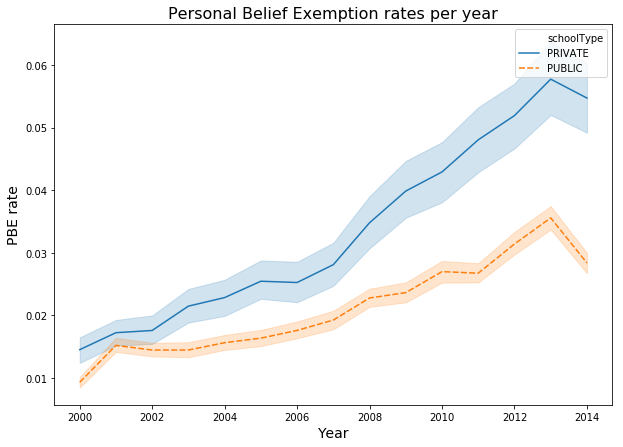

In [7]:
plt.figure(figsize=(10,7))
sns.lineplot(x="year", y="PBE_rate", hue="schoolType", style="schoolType", data=SD)
plt.title('Personal Belief Exemption rates per year', Fontsize=16);
plt.ylabel('PBE rate', Fontsize=14);
plt.xlabel('Year', Fontsize=14);

## Making the Box Plot trends clearer
Building on what the box plots have shown us, we can see the steady increase in exemption rates for both public and private schools. This graph makes it clear where the largest increases in exemption rates are coming from. 

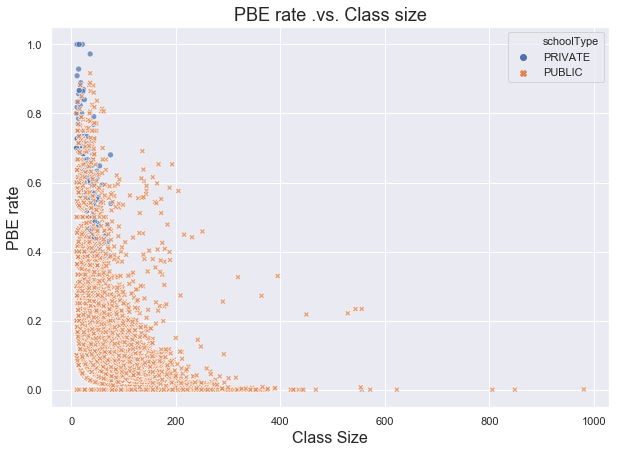

In [8]:
CSize=SD['n']
Rate=SD['PBE_rate']
z = SD['schoolType']
sns.set()
plt.figure(figsize=(10,7))
sns.scatterplot(x=CSize, y=Rate, hue=z, style=z, data=SD, alpha=0.7)
plt.xlabel('Class Size', Fontsize=16);
plt.ylabel('PBE rate', Fontsize=16);
plt.title('PBE rate .vs. Class size', Fontsize=18);

# Class size and it's effect on the rate of Personal Belief Exemptions
Given that class size varies greatly between Public and Private schools, we hope to explore whether there is a connection between these two variables. 
### Problems with this graph
It is apparent from this graph that the number of public schools in the data is very large. In fact it's is so large that it drowns out the information from private schools. Not only are the class sizes in Public schools very large but there are also more public school datapoints than there are private school data points.  This oversampling is something touched on earlier when we were discussing why the box plots showed public reported a higher number of exemptions than private schools. Back then, this was a phenomenon that could be interpreted. However, in this case it becomes a hindrance and requires we undersample our data set to achieve a more informative visual.

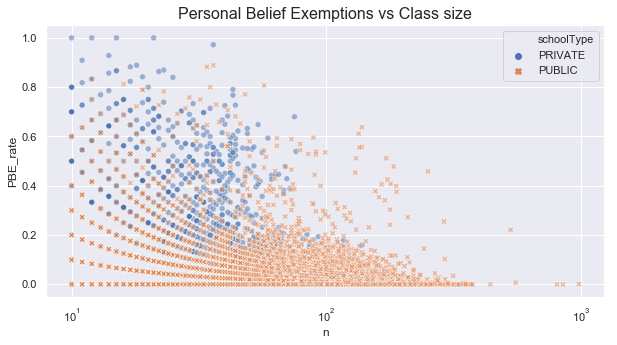

In [9]:
SDU = SDpub.sample(n=28005)#creating an undersampled dataframe from Public school data, without replacement.
frames = [SDU, SDpriv] #set a variable equal to my two dataframes 
SDsampled = pd.concat(frames) #merge both dataframes together for a full undersampled DF

x3=SDsampled['n']
y5=SDsampled['PBE_rate']
z1= SDsampled['schoolType']
sns.set()
plt.figure(figsize=(10,5))
sns.scatterplot(x=x3, y=y5,hue=z,style=z,data=SDsampled, alpha=0.5, x_jitter=0.2, y_jitter=0.2)
plt.title('Personal Belief Exemptions vs Class size', Fontsize=16)
plt.xscale('log')

## What has changed?
To deal with the different class sizes we are already using the Personal Belief Exemption rate. We also had a clustering problem in the previous graph. Even though class sizes vary greatly between public and private schools, most class sizes were clustered in one corner near the origin. To avoid this clustering a log scale is used. 

There doesn't seem to be any causal relationship between class size and Exemption rates. However, we can see that Private schools are more likely to be found at high Exemption rates, greater that 0.5 when class size is small. This is still not conclusive evidence but given that we know class sizes tend to be small in private schools, high exemption rates do not bode well because it means there are classes with a majority of students that aren't vaccinated.

The herd immunity threshold is calculated under the assumption that the population is well mixed and that there is equal probability of any individual meeting another one. However we know that human populations aren't perfectly homogenous. Disease outbreaks are likely to start in one area and then radiate outwards. This means we want to avoid creating sub-populations that are ideal for incubating diseases. This data only looks at one small section of the population at one time period (Kindergarten) but doesn't look at the location of the outbreaks. Taking this into account one should be concerned by the high rates of exemption but temper that worry since the geographic clustering isn't accounted for.



# Distribution of Vaccination Rates in different counties
It was my assumption that wealthier families would attend private schools more often and obtain more Personal Belief Exemptions. The data we are working with also doesn't contain geographic information but there are ways to extract some information from the data. 

In [15]:
f=SD.nlargest(50, 'PBE_rate')


## By County
Using information from the [U.S. Census Bureu](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=CF), I was able to compare the median houshold income by county. This was my primary method of judging the wealth of a county. The Census Bureu requires you to input certain constraints before aggregating the data. This information was obtained by typing California into the community search, clicking under Income in the side tab and choosing median income from the choices. Once here I used the information from  2014, the last year my vaccination data was reported. Since my vaccination data doesn't include income data per student, this is the closest I can come to testing this hypothesis. The counties to be compared are Mendocino (median Houshold Income = $\$$43,290), Marin (median Houshold Income = $\$$ 91,529), Siskiyou (median Houshold Income = $\$$ 37,495) and Sonoma (median Houshold Income = $\$$ 63,799). 

The counties I picked also appeared in the list with the largest 50 rates of Personal Belief Exemptions in California.  

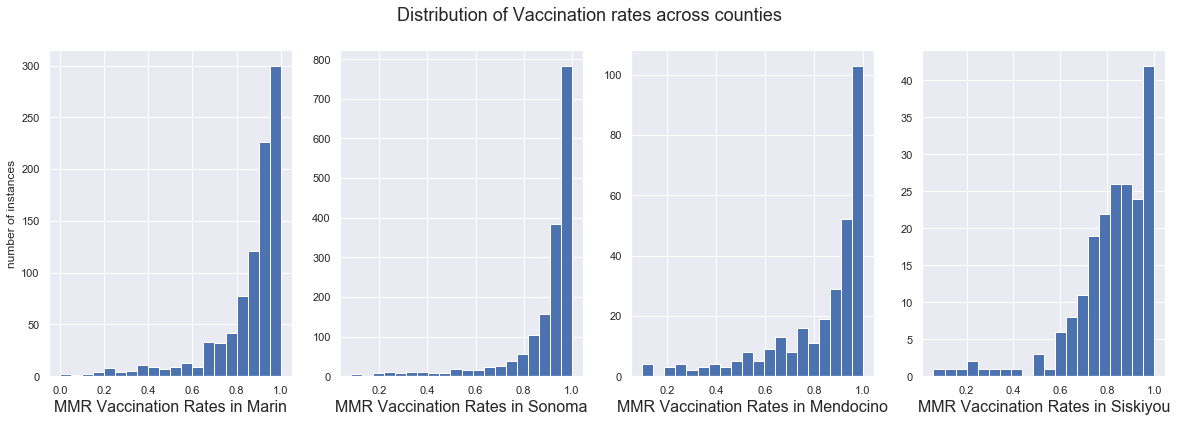

In [12]:
MAR = SD.loc[lambda df:SD['COUNTY'] == 'MARIN'] #new dataframe for Marin County
MEN = SD.loc[lambda df:SD['COUNTY'] == 'MENDOCINO'] #Mendocino County
SM = SD.loc[lambda df:SD['COUNTY'] == 'SONOMA'] #Sonoma County
SK = SD.loc[lambda df:SD['COUNTY'] == 'SISKIYOU'] #Siskiyou County

fig, axs = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Distribution of Vaccination rates across counties', fontsize=18)
axs[0].set_ylabel('number of instances')

axs[2].hist(MEN['MMR_rate'], bins=20)
axs[2].set_xlabel('MMR Vaccination Rates in Mendocino', fontsize=16);

axs[0].hist(MAR['MMR_rate'], bins=20)
axs[0].set_xlabel('MMR Vaccination Rates in Marin', fontsize=16);

axs[1].hist(SM['MMR_rate'], bins=20);
axs[1].set_xlabel('MMR Vaccination Rates in Sonoma', fontsize=16);

axs[3].hist(SK['MMR_rate'], bins=20);
axs[3].set_xlabel('MMR Vaccination Rates in Siskiyou', fontsize=16);

# Does median Household Income or County have an effect?
The four counties used for this comparison have very different median incomes and are graphed from left to right, greatest to least. Only the MMR Vaccination rates are shown because the distributions for the other vaccines are very similar and do not differ significantly. 
It should be noted that these vaccination rates are very different from the histograms we saw for all of California. When we looked at the aggregated data for California, we couldn't see the details of the smaller segments of the population. As noted earlier, human populations are not homogenous and different communities behave and live under slightly different conditions. This natural variation was hidden in the aggregated data.
If the state data was less than ideal, then these are cause for concern. Vaccination rates as low as 60% are found on this graph. These counties also have populations that are below 500,000, that is to say their herds are much smaller. There doesn't seem to be any evidence of a link between the wealth of a county and it's vaccination rates. In fact the opposite is true. Siskiyou County which is among the poorest in the State has some of the lowest vaccination rates in kindergarteners.


# Do Low Vaccination rates cluster in schools?
Another question we can ask is whether a specific school shows consistently low vaccination rates. 

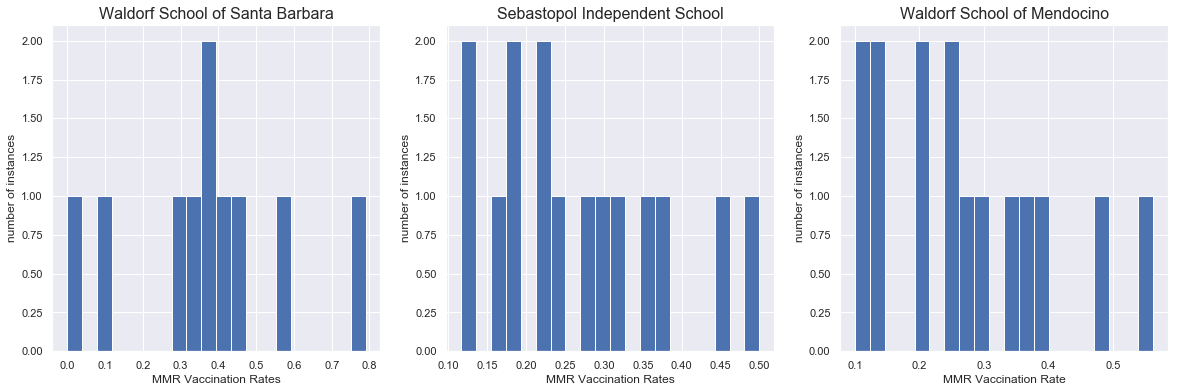

In [13]:
W = SD.loc[lambda df:SD['school_code'] == 6938518]#waldorf school of Santa Barbara
T = SD.loc[lambda df:SD['school_code'] == 6993794] #waldorf school Mendocino
R = SD.loc[lambda df:SD['school_code'] == 6113039] #Sebastopol Independent School

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].hist(W['MMR_rate'], bins=20)
axs[0].set_xlabel('MMR Vaccination Rates');
axs[0].set_ylabel('number of instances')
axs[0].set_title('Waldorf School of Santa Barbara', Fontsize=16);

axs[1].hist(R['MMR_rate'], bins=20)
axs[1].set_xlabel('MMR Vaccination Rates');
axs[1].set_ylabel('number of instances');
axs[1].set_title('Sebastopol Independent School', Fontsize=16);

axs[2].hist(T['MMR_rate'], bins=20)
axs[2].set_xlabel('MMR Vaccination Rate');
axs[2].set_ylabel('number of instances');
axs[2].set_title('Waldorf School of Mendocino', Fontsize=16);

### The Performance of the schools, is it unique?
The schools observed in the histograms above are all private schools in counties in the upper ranks of counties in terms of Household income. In this respect it is a test of hypothesis but the above distributions aren't unique to private schools, higher income households or both. Each histogram has a total of 15 data points, one for every year of the dataset. Only certain schools had complete records. Why some records were missing from some schools wasn't given with the raw data. As we can see no school reported vaccination rates in the 95%-100% range. In fact the Waldorf school is the only school to report vaccination rates high than 0.5 and it only achieved that feat twice. These vaccination rates are very concerning.

Earlier during the discussion about the ideal vaccination level of the population we introduced the Herd Immunity Threshold 
$1-(1/R_0)$. There is an implicit assumption in this formula and it is that human populations are properly modeled as homogenous and well-mixing. This is however a flawed assumption when the population is large.

Human population tend to cluster so that they are best modeled as many small networks clustered within larger networks. The reasons people decide to live in specific areas are also very varied and range from economic reasons to personal ones that aren't quantifiable. The point is that this phenomenon of human demographics makes the clustering of low vaccine rates a much more serious problem. 

If the populations were well mixed the likelihood of an outbreak is low because the risk of a non vaccinated individual being a vector is suppressed by the relative immunity of the herd. This idea of a relative immunity is crucial for the nested network model of human populations. The herd for most people is confined to their immediate environment of school, work, and larger city or neighborhood. This smaller size of the herd is what makes outbreaks more likelihood when vaccination rates get too low.
Thus outbreaks are better thought of as person to person vectors that build up to a local population. This local population simultaneously interacts with the neighboring populations. This milder form of mixing has real consequences.

While my hypothesis wasn't supported it did indicated that these low vaccination rates were common across California regardless of economic status, County, or school status. This means that across three different levels of analysis, vaccination rates were low and exemption rates were high indicating this was a problem across California. The fact that children are among the most vulnerable segments of the populations because of their less developed immune system only heightens the worry by the low vaccination rates observed.


# Conclusions
This data ranges from 2000-2014 and in this time period it reasonable to say that Herd immunity in California was compromised. My initial hypothesis of private schools being more likely to have higher rates of non-medical exemptions was only partially supported. Private schools showed higher rates of exemptions but public schools also deserve a good portion of the blame even when controlling for over sampling. The second hypothesis that economic status would affect the vaccination rates wasn't supported. Low vaccination rates were found in many counties with varying levels of median household income. These results while disappointing did point out that low vaccination rates were clustering at the school level, 0-5 year age range, and at the County level. In many ways these are enough of a warning sign that herd immunity was at risk, it isn't very important that economic status isn't a factor.

In 2015 California enacted Senate Bill 277 which eliminated the non medical personal belief exemptions. These actions were also prompted by real world outbreaks that were thankfully contained. In 2013 the California Department of Public Heath [declared a Pertussis epidemic in the state](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6348a2.htm). Epidemics for preventable diseases are cyclical as described in the CDC study linked. The study also explains that the cycles and average rate if incidence of these diseases are affected by the size of the population. California also had a [Measles outbreak in Orange County](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6414a1.htm). The fact that the outbreaks were within the range of this data and were also diseases the analyzed vaccines are designed to prevent is not a surprise. The Pertussis outbreak was clustered within children aged 0-5 years who had also received one or no doses of the DTP vaccine. Similarly 45% of cases in Orange County reported no MMR vaccinations. As human populations grow we will have to deal slightly large incidences of the diseases but an aggressive vaccination policy should keep the numbers low. 

Senate Bill 277 (SB-277) is a glimpse to this more aggressive vaccination policy. In addition to eliminating Personal Belief Exemptions, the Bill also increased the number of doses of a vaccine a child must have before entering school to full immunization of the three vaccine cocktails examined in this analysis. The [Law](http://leginfo.legislature.ca.gov/faces/billNavClient.xhtml?bill_id=201520160SB277) also gives schools and education departments a legal mechanism to expel students who do not comply with these policies. As a further tightening, California agreed to honor exemptions granted before January 1, 2016 but with the caveat that once the student enters a new grade span, (i.e. becomes part of a larger more connected herd), the exemption would no longer be valid. California has recognized this threat to it's public Health and responded in a manner that will keep the public safe. 

## Future research
While California has effectively closed off the legal pathway to a vaccine exemption for personal beliefs, many are worrying that families will begin to [exploit medical exemptions for vaccinations](https://www.latimes.com/opinion/editorials/la-ed-vaccine-exemption-crackdown-20171108-story.html). According to California SB-277 medical exemptions written by a doctor are still permissable. The article describes how some doctors allegedly "offer to write exemptions for children with such ailments as eczema, diabetes and asthma." There will undoubtedly be follow up studies to asses the effects of the new law and it would be wise to observe the rates of medical exemptions. Valid medical exemptions are generally limited to allergic reactions to specific ingredients in the vaccine and not the infectious agent itself. These rate are thus typically very low.  


C:\Users\Omar\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


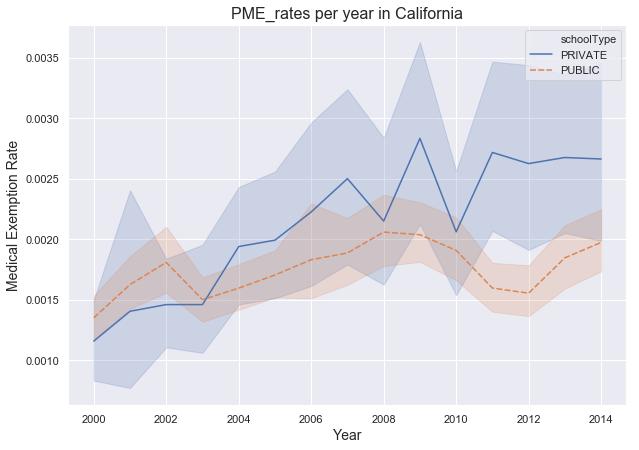

In [14]:
plt.figure(figsize=(10,7))
>>> ax = sns.lineplot(x="year", y="PME_rate",
...                   hue="schoolType", style="schoolType", data=SD)

plt.title('PME_rates per year in California', Fontsize=16);
plt.xlabel('Year', Fontsize=14);
plt.ylabel('Medical Exemption Rate', Fontsize=14);

As we can see for California the Medical Exemption rate was an order of magnitude lower than the Person Belief Exemption Rates shown earlier. If this is thought of as the sort of "background" or "normal" level then significant deviations from these rates would be cause for concern as they would be negating the effects of SB-277.

This analysis also attempted to answer whether economic performance had any effect on the vaccination rates. However, the data didn't have economic data as a feature and instead I relied on information obtained from the U.S. Census Bureau. While the data is reasonable accurate, it is the aggregated data of many families who may or may not be vaccinated individuals. To accommodate this I observed the changes on a county level but a more well integrated set of economic data would be better suited for answering that hypothesis.